<a href="https://colab.research.google.com/github/williamwbs/learningML/blob/master/01.Introdu%C3%A7%C3%A3o/Engenharia%20de%20Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sobre a Base de Dados: Diabetes¹
A base possui dados gerais e resultado exames de pacientes mulheres com pelo menos 21 anos de herança indiana pima.

Atributos
- Número de gravidezes
- Concentração de glicose plasma a 2 horas em um teste oral de tolerância à glicose
- Pressão sanguínea diastólica (mm Hg)
- Espessura da dobra da pele do tríceps
- 2-Horas de insulina sérica (mu U/ml)
- Índice de massa corporal (peso em kg ➗ (altura em m)²)
- Função de pedigree da diabetes
- Idade
- Label (0 or 1)
---
¹ https://www.kaggle.com/uciml/pima-indians-diabetes-database


## Tarefas
- Caso ainda não tenha, cadastre-se no site kaggle.com
- Faça o download do dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database
---

## Lendo arquivo externo

In [3]:
# Biblioteca para operações em arquivos locais
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [4]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()

,numero_gravidezes,concentracao_glicose,pressao_sanguinea,espessura_triceps,insulina_serica,massa_corporal,funcao_diabetes,idade,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Extrai features e rótulos do dataframe
X = df.drop('label', axis=1).as_matrix()
y = df['label'].as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


## Engenharia de Features

### Normalização

In [6]:
# Classe para normalizar os valores entre 0 e 1
from sklearn.preprocessing import MinMaxScaler

# Aplica transformação de MinMax nas features
X2 = MinMaxScaler().fit_transform(X)
X2

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

### Criação de features polinomiais

In [0]:
# Essa classe é utilizada para geração de features usando polinomios (x², x³)
from sklearn.preprocessing import PolynomialFeatures

# Cria features polinomiais
model = PolynomialFeatures(degree=3, include_bias=False)
X2 = model.fit_transform(X)
print('Tamanho da tabela original: (Linhas, Colunas) {}'.format(X.shape))
print('Tamanho da tabela tratada: (Linhas, Colunas) {}'.format(X2.shape))
X2

In [0]:
# Perceba o número de combinações que foram geradas
model.get_feature_names(df.columns)

### Exemplo simplificado do uso de features polinomiais

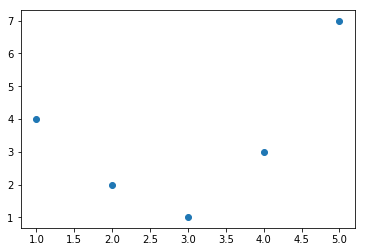

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

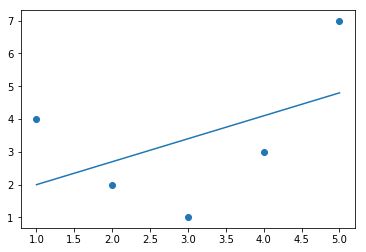

In [11]:
# Nesse nosso conjunto de dados sintético, vamos fazer um experimento simples

# Modelo de regreção
from sklearn.linear_model import LinearRegression

# Preparando dados
X = x.reshape(-1, 1)

# Instanciação e treinamento do modelo
model = LinearRegression().fit(X, y)

# Prediz os valores
yfit = model.predict(X)

# Gráfico
plt.scatter(x, y)
plt.plot(x, yfit);

In [12]:
# Essa classe é utilizada para geração de features usando polinomios (x², x³)
from sklearn.preprocessing import PolynomialFeatures

# Cria instância para tratamento das features
poly = PolynomialFeatures(degree=3, include_bias=False)

# Aplica a transformação e cria as features polinomiais
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


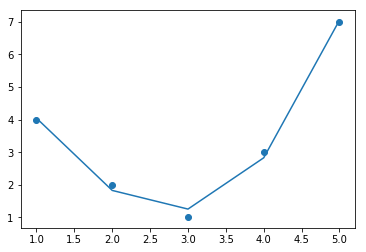

In [13]:
# Retreinando o Modelo
model = LinearRegression().fit(X2, y)

# Prediz os valores
yfit = model.predict(X2)

# Gráfico
plt.scatter(x, y)
plt.plot(x, yfit);

### Exemplo de exploração das features

In [30]:
df.describe()

,numero_gravidezes,concentracao_glicose,pressao_sanguinea,espessura_triceps,insulina_serica,massa_corporal,funcao_diabetes,idade,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Será que todos esses valores fazem sentido?

Por exemplo, com base nas informações fornecidas para a pressão arterial em adultos no wikipedia, qualquer pressão arterial abaixo de 60 é considerada hipotensão que precisa ser tratada imediatamente, pois indica que não há sangue suficiente para atingir os órgãos da pessoa, a pessoa é considerada em "choque". Assumindo que estas são mulheres saudáveis e normais que atualmente não sofrem de hipotensão ou estão no pronto-socorro sendo tratadas de hipotensão e estão acordadas no momento da coleta de dados, os valores de 0 são claramente inválidos.

In [37]:
print(df[df['pressao_sanguinea'] == 0].shape[0])
print(df[df['pressao_sanguinea'] == 0].index.tolist())
print(df[df['pressao_sanguinea'] == 0].groupby('label')['idade'].count())
print(df.groupby('idade')['pressao_sanguinea'].max())

35
[7, 15, 49, 60, 78, 81, 172, 193, 222, 261, 266, 269, 300, 332, 336, 347, 357, 426, 430, 435, 453, 468, 484, 494, 522, 533, 535, 589, 601, 604, 619, 643, 697, 703, 706]
label
0    19
1    16
Name: idade, dtype: int64
idade
21     96
22    100
23     90
24     88
25     90
26    110
27    122
28     98
29     90
30     96
31     90
32     92
33     98
34     98
35    100
36     90
37    110
38     92
39     90
40     88
41    104
42     90
43    106
44    114
45    102
46     90
47    106
48     92
49     88
50     90
51    106
52    104
53     88
54    110
55     78
56     85
57     82
58     90
59     84
60     95
61     92
62     84
63     86
64     78
65    108
66     92
67     80
68     82
69     82
70     82
72      0
81     74
Name: pressao_sanguinea, dtype: int64


Algumas possíveis soluções são:
- Remover os registros com esse erro
- Ignorar a coluna
- Inserir a média dos valores nos resultados faltantes